# <font color = 'orange'> Support Vector Regressor

---

### <font color = 'Blue'> Import library, load dataset

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [3]:
x, y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)

In [4]:
print(x)
print()
print(y)

[[-1.08322828 -1.71055803]
 [-0.30920799  0.85748358]
 [-1.01752488 -0.30129944]
 ...
 [-0.1076261   0.22621769]
 [-0.36599119  0.95907166]
 [ 0.73178355 -1.87675516]]

[-2.02369206e+02  4.98994195e+01 -8.03596849e+01 -4.85237109e+01
  1.24468634e+01  6.86421309e+01  1.40498017e+01 -1.68170916e+02
 -1.26097458e+02  5.18655112e+01  2.61558541e+01 -2.53999192e+01
 -1.22690423e+02  1.43084967e+02  5.94864734e+01  1.79639604e+01
  6.39394874e+01  3.02358047e+01  1.26160283e+01  1.63686791e+02
 -6.32360196e+01  9.40038250e+01  1.52778862e+00 -4.15908437e+00
  5.98359461e+01  5.35531582e+01 -3.89823355e+01 -3.28820216e+01
  1.14144092e+02  2.03109471e+01 -1.94356948e+02 -1.35938306e+01
 -6.87680384e+01  9.20584973e+01 -1.26043781e+02 -5.28466883e+01
 -1.28521459e+02 -3.16127937e+01 -1.60246650e+02  1.08899718e+01
 -1.40075411e+02 -2.12926553e+01  3.77839767e+01 -4.61995698e+01
 -5.21741488e+01 -6.98385114e+01 -7.94856669e+01  1.93865083e+02
 -2.86319146e+01  1.18588184e+02  4.56734948e+01 -2

In [5]:
pd.DataFrame(x)[0]

0     -1.083228
1     -0.309208
2     -1.017525
3     -1.815361
4      0.719064
         ...   
995   -0.917240
996    0.308923
997   -0.107626
998   -0.365991
999    0.731784
Name: 0, Length: 1000, dtype: float64

---

### <font color = 'Blue'> Scatter plot

<AxesSubplot:xlabel='0', ylabel='1'>

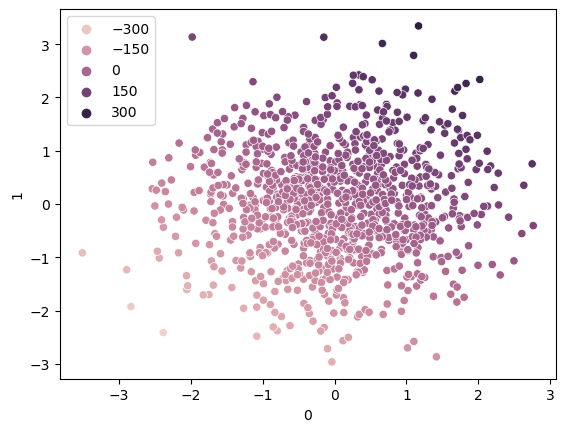

In [6]:
sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1],hue = y)

---

### <font color = 'Blue'> 1. Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 10)

---

### <font color = 'Blue'> 2. Model Training

In [9]:
from sklearn.svm import SVR

In [10]:
svr = SVR(kernel = 'linear')

In [11]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[56.91880126, 78.74099748]])

---

### <font color = 'Blue'> 3. Prediction

In [13]:
y_pred = svr.predict(x_test)

---

### <font color = 'Blue'> 4. Performance Metrics

In [14]:
from sklearn.metrics import r2_score

In [15]:
print(f'R2 score : {r2_score(y_test,y_pred)}')

R2 score : 0.9989930262714491


---

## Hyperparameter Tuning with SVR

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
parameters = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear'],
    'epsilon' : [0.1,0.2,0.3]
}

In [18]:
grid_cv = GridSearchCV(SVR(),param_grid = parameters,refit = True, verbose = 3)

In [19]:
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.738 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.746 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.742 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.740 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.738 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.746 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.742 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.740 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[C

[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   

[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5]

[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.2s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.2s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.3s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.3s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.3s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.2s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.2s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.3s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.3s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.3s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=li

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid_cv.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
# Prediction
y_pred = grid_cv.predict(x_test)

In [22]:
# Performance metrics
print(f'R2 score : {r2_score(y_test,y_pred)}')

R2 score : 0.9990218280637235


---